In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('mnist/', one_hot = True)

W1022 20:58:37.422291  1756 deprecation.py:323] From <ipython-input-2-ebe407ce86bf>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1022 20:58:37.432282  1756 deprecation.py:323] From C:\Users\Allan Santos\.conda\envs\AM\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W1022 20:58:37.438279  1756 deprecation.py:323] From C:\Users\Allan Santos\.conda\envs\AM\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be remov

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz


W1022 20:58:44.587579  1756 deprecation.py:323] From C:\Users\Allan Santos\.conda\envs\AM\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W1022 20:58:44.590574  1756 deprecation.py:323] From C:\Users\Allan Santos\.conda\envs\AM\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz


W1022 20:58:46.248591  1756 deprecation.py:323] From C:\Users\Allan Santos\.conda\envs\AM\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [3]:
X_treinamento = mnist.train.images
y_treinamento = mnist.train.labels
X_teste = mnist.test.images
y_teste = mnist.test.labels
X_treinamento.shape

(55000, 784)

In [4]:
X_treinamento[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [5]:
y_treinamento.shape

(55000, 10)

In [6]:
y_treinamento[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [7]:
X_teste.shape

(10000, 784)

Text(0.5, 1.0, 'Classe: 3')

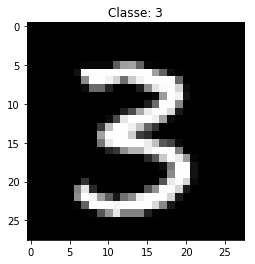

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.imshow(X_treinamento[102].reshape((28,28)), cmap = 'gray')
plt.title('Classe: ' + str(np.argmax(y_treinamento[102])))

In [9]:
X_batch, y_batch = mnist.train.next_batch(128)
X_batch.shape

(128, 784)

In [10]:
neuronios_entrada = X_treinamento.shape[1]
neuronios_entrada

784

In [11]:
neuronios_oculta1 = int((X_treinamento.shape[1] + y_treinamento.shape[1]) / 2)
neuronios_oculta1

397

In [12]:
neuronios_oculta2 = neuronios_oculta1
neuronios_oculta3 = neuronios_oculta1
neuronios_saida = y_treinamento.shape[1]
neuronios_saida

10

In [13]:
# 784 -> 397 -> 397 -> 397 -> 10
import tensorflow as tf

In [14]:
W = {'oculta1': tf.Variable(tf.random_normal([neuronios_entrada, neuronios_oculta1])),
     'oculta2': tf.Variable(tf.random_normal([neuronios_oculta1, neuronios_oculta2])),
     'oculta3': tf.Variable(tf.random_normal([neuronios_oculta2, neuronios_oculta3])),
     'saida': tf.Variable(tf.random_normal([neuronios_oculta3, neuronios_saida])) 
}

In [15]:
b = {'oculta1': tf.Variable(tf.random_normal([neuronios_oculta1])),
     'oculta2': tf.Variable(tf.random_normal([neuronios_oculta2])),
     'oculta3': tf.Variable(tf.random_normal([neuronios_oculta3])),
     'saida': tf.Variable(tf.random_normal([neuronios_saida]))   
}

In [16]:
xph = tf.placeholder('float', [None, neuronios_entrada])
yph = tf.placeholder('float', [None, neuronios_saida])

In [17]:
def mlp(x, W, bias):
    camada_oculta1 = tf.nn.relu(tf.add(tf.matmul(x, W['oculta1']), bias['oculta1']))
    camada_oculta2 = tf.nn.relu(tf.add(tf.matmul(camada_oculta1, W['oculta2']), bias['oculta2']))
    camada_oculta3 = tf.nn.relu(tf.add(tf.matmul(camada_oculta2, W['oculta3']), bias['oculta3']))
    camada_saida = tf.add(tf.matmul(camada_oculta3, W['saida']), bias['saida'])
    return camada_saida

In [18]:
modelo = mlp(xph, W, b)
erro = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = modelo, labels = yph))
otimizador = tf.train.AdamOptimizer(learning_rate = 0.0001).minimize(erro)

In [19]:
previsoes = tf.nn.softmax(modelo)
previsoes_corretas = tf.equal(tf.argmax(previsoes, 1), tf.argmax(yph, 1))
taxa_acerto = tf.reduce_mean(tf.cast(previsoes_corretas, tf.float32))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoca in range(5000):
        
        X_batch, y_batch = mnist.train.next_batch(128)
        _, custo = sess.run([otimizador, erro], feed_dict = {xph: X_batch, yph: y_batch})
        if epoca % 100 == 0:
            acc = sess.run([taxa_acerto], feed_dict = {xph: X_batch, yph: y_batch})
            print('época: ' + str((epoca + 1)) + ' erro: ' + str(custo) + ' acc: ' + str(acc))
            
    print('Treinamento concluído')
    print(sess.run(taxa_acerto, feed_dict = {xph: X_teste, yph: y_teste}))

In [ ]:
y_teste